# Life Insurance Assessment
PT. XYZ adalah salah satu asuransi terbesar di USA. Selama ini proses aplikasi asuransi  memerlukan waktu yang lama yaitu sekitar 30 hari. Selain itu, pelanggan diharuskan memberikan informasi yang sangat detail. Itulah mengapa hanya 40% rumah tangga AS yang memiliki asuransi jiwa perorangan. <br><br>
PT. XYZ ingin membuat proses aplikasi lebih cepat yaitu dengan memanfaatkan pemodelan prediktif. Model ini diharapkan dapat memprediksi secara akurat resiko calon applicant. Dengan mengetahui lebih cepat tingkat resiko calon applicant, PT. XYZ dapat dengan lebih cepat menyelesaikan proses aplikasi dan mengakuisisi customer. 
 

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [168]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train,test],0, sort=False)
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,0.0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,1.0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,0.0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,0.0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,0.0


In [169]:
y = train['Response']
del data['Response']

In [170]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,0


In [171]:
print ("Rows, Columns     : " ,data.shape)

Rows, Columns     :  (79146, 127)


In [172]:
print ("Features : \n" ,data.columns.tolist())

Features : 
 ['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_Hi

### Variable Description<br>
Id : A unique identifier associated with an application.<br>
Product_Info_1-7 : A set of normalized variables relating to the product applied for.<br>
Ins_Age : Normalized age of applicant.<br>
Ht : Normalized height of applicant.<br>
Wt : Normalized weight of applicant.<br>
BMI : Normalized BMI of applicant.<br>
Employment_Info_1-6 : A set of normalized variables relating to the employment history of the applicant.<br>
InsuredInfo_1-6 : A set of normalized variables providing information about the applicant.<br>
Insurance_History_1-9 : A set of normalized variables relating to the insurance history of the applicant.<br>
Family_Hist_1-5 : A set of normalized variables relating to the family history of the applicant.<br>
Medical_History_1-41 : A set of normalized variables relating to the medical history of the applicant.<br>
Medical_Keyword_1-48 : A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.<br>
Response : This is the target variable, an ordinal variable relating to the final decision associated with an application.<br>

In [173]:
print ("\nUnique values :  \n",data.nunique())


Unique values :  
 Id                    79146
Product_Info_1            2
Product_Info_2           19
Product_Info_3           38
Product_Info_4         2054
                      ...  
Medical_Keyword_44        2
Medical_Keyword_45        2
Medical_Keyword_46        2
Medical_Keyword_47        2
Medical_Keyword_48        2
Length: 127, dtype: int64


In [174]:
data.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_44      int64
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Length: 127, dtype: object

In [175]:
print ("Product_Info_1 :\n", data['Product_Info_1'].value_counts(), "\n")
print ("Product_Info_5 :\n", data['Product_Info_5'].value_counts(), "\n")
print ("Product_Info_6 :\n", data['Product_Info_6'].value_counts(), "\n")
print ("Product_Info_7 :\n", data['Product_Info_7'].value_counts())

Product_Info_1 :
 1    77087
2     2059
Name: Product_Info_1, dtype: int64 

Product_Info_5 :
 2    78604
3      542
Name: Product_Info_5, dtype: int64 

Product_Info_6 :
 3    66053
1    13093
Name: Product_Info_6, dtype: int64 

Product_Info_7 :
 1    77422
3     1722
2        2
Name: Product_Info_7, dtype: int64


In [176]:
data['Product_Info_1'] = pd.Categorical(data['Product_Info_1'])
data['Product_Info_5'] = pd.Categorical(data['Product_Info_5'])
data['Product_Info_6'] = pd.Categorical(data['Product_Info_6'])
data['Product_Info_7'] = pd.Categorical(data['Product_Info_7'])

In [177]:
data[data.duplicated()]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48


In [178]:
sum(data.isna().sum())/(data.shape[0]*data.shape[1])*100

5.210931815237901

In [179]:
data_missing = pd.DataFrame(data.isnull().sum() / len(data)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Medical_History_10,0.990423
Medical_History_32,0.981578
Medical_History_24,0.937066
Medical_History_15,0.751270
Family_Hist_5,0.700414
Family_Hist_3,0.572423
Family_Hist_2,0.486898
Insurance_History_5,0.423281
Family_Hist_4,0.326751
Employment_Info_6,0.184987


In [180]:
#kolom yang memiliki persentase data missing diatas 30% akan saya drop.
drop = data_missing[data_missing[0] > 0.3]
drop

,0
Medical_History_10,0.990423
Medical_History_32,0.981578
Medical_History_24,0.937066
Medical_History_15,0.751270
Family_Hist_5,0.700414
Family_Hist_3,0.572423
Family_Hist_2,0.486898
Insurance_History_5,0.423281
Family_Hist_4,0.326751


In [181]:
data.drop(columns=drop.index, inplace=True)
data.shape

(79146, 118)

In [182]:
for feature in data_missing[(data_missing[0] > 0) & (data_missing[0] <= 0.3)].index:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [183]:
#cek lagi
sum(data.isna().sum())/(data.shape[0]*data.shape[1])*100

0.0

In [184]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,0


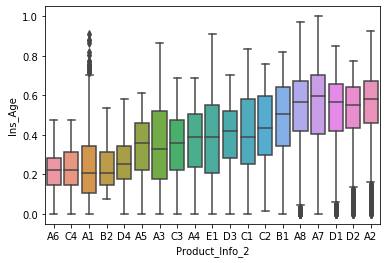

In [185]:
vis = data[['Product_Info_2','Ins_Age']].groupby('Product_Info_2').mean().sort_values('Ins_Age')
sns.boxplot(x=data['Product_Info_2'], y=data['Ins_Age'],order=vis.index)

In [186]:
data['New_Product_Info_2']='NULL'
catt=('category1','category2','category3')
cat1=['A6','C4','A1','B2','D4','A5','A3']
cat2=['C3','A4','E1','D3','C1','C2']
cat3=['B1','A8','A7','D1','D2','A2']
cat=(cat1,cat2,cat3)
s=0
for i in cat:
    for j in i:
        data['New_Product_Info_2'][data['Product_Info_2']==j]=catt[s]
    s=s+1
data['New_Product_Info_2']

0        category2
1        category1
2        category2
3        category1
4        category3
           ...    
19760    category2
19761    category1
19762    category3
19763    category3
19764    category2
Name: New_Product_Info_2, Length: 79146, dtype: object

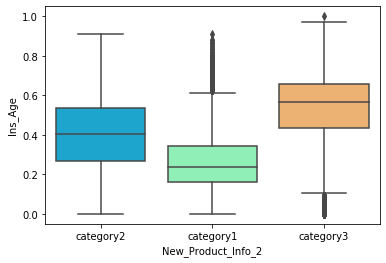

In [187]:
sns.boxplot(x = data['New_Product_Info_2'], 
            y = data['Ins_Age'], palette='rainbow')

In [188]:
del data['Product_Info_2']

In [189]:
data['BMI_Age'] = data['BMI'] * data['Ins_Age']
data['BMI_Age'].head()

0    0.207304
1    0.016256
2    0.012799
3    0.057863
4    0.177213
Name: BMI_Age, dtype: float64

In [190]:
# BMI_Age Categorization
conditions = [
    (data['BMI_Age'] <= data['BMI_Age'].quantile(0.25)),
    (data['BMI_Age'] > data['BMI_Age'].quantile(0.25)) & (data['BMI_Age'] <= data['BMI_Age'].quantile(0.75)),
    (data['BMI_Age'] > data['BMI_Age'].quantile(0.75))]

choices = ['Under', 'Average', 'Over']
#15
data['BMI_Age_Cat'] = np.select(conditions, choices)

In [191]:
# BMI Categorization
conditions = [
    (data['BMI'] <= data['BMI'].quantile(0.25)),
    (data['BMI'] > data['BMI'].quantile(0.25)) & (data['BMI'] <= data['BMI'].quantile(0.75)),
    (data['BMI'] > data['BMI'].quantile(0.75))]

choices = ['Under', 'Average', 'Over']
#15
data['BMI_Cat'] = np.select(conditions, choices)


In [192]:
# Age Categorization
conditions = [
    (data['Ins_Age'] <= data['Ins_Age'].quantile(0.25)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.25)) & (data['Ins_Age'] <= data['Ins_Age'].quantile(0.75)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.75))]

choices = ['Young', 'Average', 'Old']
#16
data['Age_Cat'] = np.select(conditions, choices)


In [193]:
# Height Categorization
conditions = [
    (data['Ht'] <= data['Ht'].quantile(0.25)),
    (data['Ht'] > data['Ht'].quantile(0.25)) & (data['Ht'] <= data['Ht'].quantile(0.75)),
    (data['Ht'] > data['Ht'].quantile(0.75))]

choices = ['Short', 'Average', 'Tall']

#17
data['Height_Cat'] = np.select(conditions, choices)

In [194]:
# Weight Categorization
conditions = [
    (data['Wt'] <= data['Wt'].quantile(0.25)),
    (data['Wt'] > data['Wt'].quantile(0.25)) & (data['Wt'] <= data['Wt'].quantile(0.75)),
    (data['Wt'] > data['Wt'].quantile(0.75))]

choices = ['Thin', 'Average', 'Fat']
#18
data['Weight_Cat'] = np.select(conditions, choices)

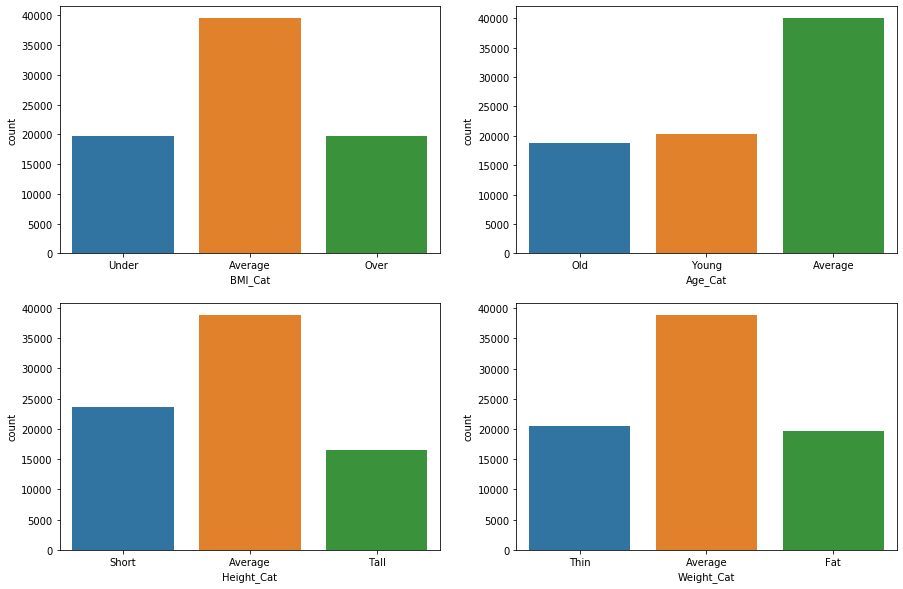

In [195]:
f = plt.figure(figsize=(15,10))
f.add_subplot(2,2,1)
sns.countplot(data['BMI_Cat'])
f.add_subplot(2,2,2)
sns.countplot(data['Age_Cat'])
f.add_subplot(2,2,3)
sns.countplot(data['Height_Cat'])
f.add_subplot(2,2,4)
sns.countplot(data['Weight_Cat'])

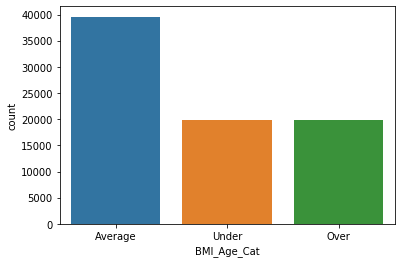

In [196]:
sns.countplot(data['BMI_Age_Cat'])

In [204]:
datanew = train.copy()

In [205]:
# Age Categorization
conditions = [
    (datanew['Ins_Age'] <= datanew['Ins_Age'].quantile(0.25)),
    (datanew['Ins_Age'] > datanew['Ins_Age'].quantile(0.25)) & (datanew['Ins_Age'] <= datanew['Ins_Age'].quantile(0.75)),
    (datanew['Ins_Age'] > datanew['Ins_Age'].quantile(0.75))]

choices = ['Young', 'Average', 'Old']
#16
datanew['Age_Cat'] = np.select(conditions, choices)


In [218]:
r = datanew[datanew['Response']==0]['Age_Cat'].value_counts()
r

Average    22839
Young      12476
Old         8866
Name: Age_Cat, dtype: int64

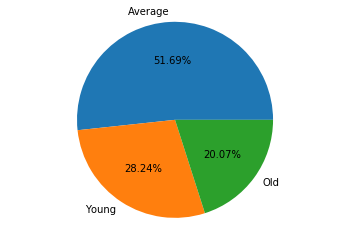

In [220]:
label = {'Average', 'Old', 'Young'}
plt.pie(r,labels=label, autopct='%2.2f%%')
plt.axis('equal')
plt.show()

In [221]:
# BMI Categorization
conditions = [
    (datanew['BMI'] <= datanew['BMI'].quantile(0.25)),
    (datanew['BMI'] > datanew['BMI'].quantile(0.25)) & (datanew['BMI'] <= datanew['BMI'].quantile(0.75)),
    (datanew['BMI'] > datanew['BMI'].quantile(0.75))]

choices = ['Under', 'Average', 'Over']
#15
datanew['BMI_Cat'] = np.select(conditions, choices)


In [222]:
s = datanew[datanew['Response']==0]['BMI_Cat'].value_counts()
s

Average    22806
Under      12220
Over        9155
Name: BMI_Cat, dtype: int64

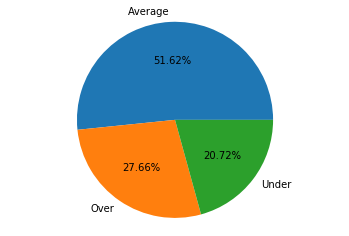

In [224]:
label = {'Average', 'Under', 'Over'}
plt.pie(s,labels=label, autopct='%2.2f%%')
plt.axis('equal')
plt.show()

In [225]:
# Height Categorization
conditions = [
    (datanew['Ht'] <= datanew['Ht'].quantile(0.25)),
    (datanew['Ht'] > datanew['Ht'].quantile(0.25)) & (datanew['Ht'] <= datanew['Ht'].quantile(0.75)),
    (datanew['Ht'] > datanew['Ht'].quantile(0.75))]

choices = ['Short', 'Average', 'Tall']

#17
datanew['Height_Cat'] = np.select(conditions, choices)

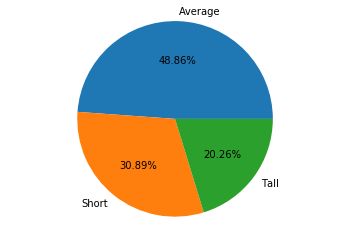

In [227]:
t = datanew[datanew['Response']==0]['Height_Cat'].value_counts()
label = {'Average', 'Short', 'Tall'}
plt.pie(t,labels=label, autopct='%2.2f%%')
plt.axis('equal')
plt.show()

In [228]:
# Height Categorization
conditions = [
    (datanew['Wt'] <= datanew['Wt'].quantile(0.25)),
    (datanew['Wt'] > datanew['Wt'].quantile(0.25)) & (datanew['Wt'] <= datanew['Wt'].quantile(0.75)),
    (datanew['Wt'] > datanew['Wt'].quantile(0.75))]

choices = ['Thin', 'Average', 'Fat']

#17
datanew['Weight_Cat'] = np.select(conditions, choices)

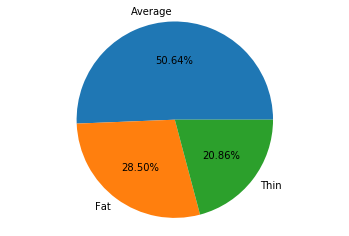

In [229]:
l = datanew[datanew['Response']==0]['Weight_Cat'].value_counts()
label = {'Thin', 'Average', 'Fat'}
plt.pie(l,labels=label, autopct='%2.2f%%')
plt.axis('equal')
plt.show()

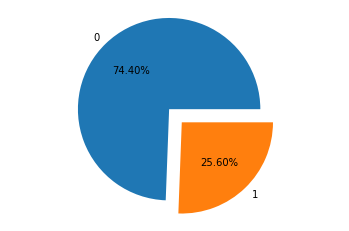

In [134]:
explode = (0.1, 0.1)
label = {'0', '1'}
plt.pie(y.value_counts(),labels=label, autopct='%2.2f%%', explode=explode)
plt.axis('equal')
plt.show()

In [135]:
data = data.set_index('Id')
data = pd.get_dummies(data)

In [136]:
data.head()

,Product_Info_3,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,...,BMI_Cat_Under,Age_Cat_Average,Age_Cat_Old,Age_Cat_Young,Height_Cat_Average,Height_Cat_Short,Height_Cat_Tall,Weight_Cat_Average,Weight_Cat_Fat,Weight_Cat_Thin
Id,,,,,,,,,,,,,,,,,,,,,
2,10,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,...,1,0,1,0,0,1,0,0,0,1
5,26,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,...,1,0,0,1,0,1,0,0,0,1
6,26,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,...,0,0,0,1,1,0,0,1,0,0
7,10,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,...,1,0,0,1,1,0,0,0,0,1
8,26,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,...,0,1,0,0,0,1,0,1,0,0


In [137]:
Xtrain = data[:len(train)]
Xtest = data[len(train):]
print("Rows, Columns of train data    : ", Xtrain.shape)
print("Rows, Columns of test data    : ", Xtest.shape)

Rows, Columns of train data    :  (59381, 140)
Rows, Columns of test data    :  (19765, 140)


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, y, stratify=y, test_size=0.2, random_state=42) 

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
all_model = [DecisionTreeClassifier,
            LogisticRegression,
            KNeighborsClassifier,
            GaussianNB,
            RandomForestClassifier]

desc_model = ['DecisionTreeClassifier',
            'LogisticRegression',
            'KNeighborsClassifier',
            'GaussianNB',
            'RandomForestClassifier']

all_model

[sklearn.tree.tree.DecisionTreeClassifier,
 sklearn.linear_model.logistic.LogisticRegression,
 sklearn.neighbors.classification.KNeighborsClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.ensemble.forest.RandomForestClassifier]

In [140]:
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    datatr.append(model.score( X_train,Y_train ))
    datasc.append(model.score( X_test , Y_test ))
    Recall.append(recall_score(Y_test,Y_pred))
    Precision.append(precision_score(Y_test,Y_pred))
    auc.append(roc_auc_score(Y_test,Y_pred))
    print(i, model.score( X_train , Y_train ) , model.score( X_test , Y_test ))

<class 'sklearn.tree.tree.DecisionTreeClassifier'> 1.0 0.7117959080575903
<class 'sklearn.linear_model.logistic.LogisticRegression'> 0.7947120242505894 0.7921192220257641
<class 'sklearn.neighbors.classification.KNeighborsClassifier'> 0.7982696194004716 0.7373074008588028
<class 'sklearn.naive_bayes.GaussianNB'> 0.727517682721455 0.7241727709017428
<class 'sklearn.ensemble.forest.RandomForestClassifier'> 0.98250673627484 0.7822682495579691


In [141]:
data1 = pd.DataFrame()
data1['model'] = desc_model
data1['Accuracy training'] = datatr
data1['Accuracy test'] = datasc
data1['Recall'] = Recall
data1['Precision'] = Precision
data1['gap'] = abs(data1['Accuracy training'] - data1['Accuracy test'])
data1.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Recall,Precision,gap
1,LogisticRegression,0.794712,0.792119,0.354934,0.679899,0.002593
4,RandomForestClassifier,0.982507,0.782268,0.312500,0.656985,0.200238
2,KNeighborsClassifier,0.798270,0.737307,0.171382,0.464349,0.060962
3,GaussianNB,0.727518,0.724173,0.518750,0.465192,0.003345
0,DecisionTreeClassifier,1.000000,0.711796,0.459211,0.439685,0.288204


In [142]:
lr = LogisticRegression()
lr.fit(X_train,pd.Categorical(Y_train))
Y_pred = lr.predict(X_test)
Y_test = pd.Categorical(Y_test)

In [145]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8837
           1       0.68      0.35      0.47      3040

    accuracy                           0.79     11877
   macro avg       0.74      0.65      0.67     11877
weighted avg       0.78      0.79      0.77     11877



In [151]:
Y_pred = lr.predict(X_test)

In [152]:
X_test['Response'] = Y_pred

In [153]:
X_test.head()

,Product_Info_3,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,...,Age_Cat_Average,Age_Cat_Old,Age_Cat_Young,Height_Cat_Average,Height_Cat_Short,Height_Cat_Tall,Weight_Cat_Average,Weight_Cat_Fat,Weight_Cat_Thin,Response
Id,,,,,,,,,,,,,,,,,,,,,
50964,26,0.333333,0.328358,0.690909,0.309623,0.521668,0.0400,9,1,0.00,...,1,0,0,1,0,0,1,0,0,0
19124,26,0.088734,0.746269,0.636364,0.299163,0.568857,0.0550,1,3,0.00,...,0,1,0,0,1,0,1,0,0,0
60189,10,0.076923,0.522388,0.654545,0.184100,0.329671,0.0000,1,3,0.00,...,1,0,0,0,1,0,0,0,1,0
28057,26,1.000000,0.194030,0.818182,0.341004,0.440433,0.0945,9,1,0.00,...,0,0,1,0,0,1,1,0,0,0
32975,26,0.384615,0.462687,0.745455,0.288703,0.428780,0.1500,14,1,0.05,...,1,0,0,1,0,0,1,0,0,0


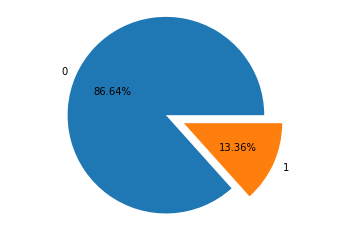

In [155]:
explode = (0.1, 0.1)
label = {'0', '1'}
plt.pie(X_test['Response'].value_counts(),labels=label, autopct='%2.2f%%', explode=explode)
plt.axis('equal')
plt.show()

In [156]:
from sklearn.externals import joblib
joblib.dump(lr, 'Testing Final Test.pkl')

['Testing Final Test.pkl']